In [1]:
import pandas_oracle.tools as pt
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.putenv('NLS_LANG', '.UTF8')
conn = pt.open_connection('../PANDAS\oracle\config2.yml')   

In [12]:
query = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_10_AMT) AMT10,
       AVG(TS_20_AMT) AMT20,
       AVG(TS_30_AMT) AMT30,
       AVG(TS_40_AMT) AMT40,
       AVG(TS_50_AMT) AMT50,
       AVG(TS_60UP_AMT) AMT60,
       (AVG(TS_10_AMT)+AVG(TS_20_AMT)+AVG(TS_30_AMT)+AVG(TS_40_AMT)+AVG(TS_50_AMT)+AVG(TS_60UP_AMT))/6 AMTAVG
       
FROM AGE_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 10
'''

In [4]:
query = "SELECT * FROM TOTALSELL"
df_total_sell = pt.query_to_df(query, conn, 100000);
df_total_sell.describe()

,TS_YEAR,TS_QUARTER,S_CODE,TS_MONTH_AMT,TS_MONTH_NUM,TS_MDWEEK_RATE,TS_ENDWEEK_RATE,TS_MDWEEK_AMT,TS_ENDWEEK_AMT,TS_MDWEEK_NUM,...,TS_MALE_NUM,TS_FEMALE_NUM,TS_10_NUM,TS_20_NUM,TS_30_NUM,TS_40_NUM,TS_50_NUM,TS_60UP_NUM,TS_MANY,TS_CODE
count,143385.0,143385.000000,1.433850e+05,1.433850e+05,143385.000000,143385.000000,143385.000000,1.433850e+05,1.433850e+05,143385.000000,...,143385.000000,143385.000000,143385.000000,143385.000000,143385.000000,143385.000000,143385.000000,143385.000000,143385.000000,143385.000000
mean,2017.0,2.494515,1.000759e+06,6.306875e+07,3810.174369,76.587460,23.505555,4.781291e+07,1.525584e+07,2811.553872,...,1995.492044,1625.517116,116.279434,1109.545315,896.942693,718.935889,488.708487,290.744478,7.594490,71693.000000
std,0.0,1.117166,4.182103e+02,1.092979e+08,9960.736048,13.470462,13.478959,8.502809e+07,3.024011e+07,7233.259347,...,5895.938183,4150.607105,680.244809,3867.056094,2572.040306,1873.070803,1226.121519,865.699969,29.641649,41391.828511
min,2017.0,1.000000,1.000001e+06,1.650000e+01,0.119048,0.000000,-100.000000,-4.087291e+06,-2.393014e+07,-4.000000,...,-1.500000,0.000000,0.000000,-0.130435,-6.500000,0.000000,0.000000,-2.666667,0.000000,1.000000
25%,2017.0,1.000000,1.000401e+06,1.066110e+07,182.363636,68.000000,14.000000,7.883923e+06,1.782435e+06,137.000000,...,75.000000,72.000000,0.000000,16.500000,30.100000,41.181818,30.000000,12.333333,2.000000,35847.000000
50%,2017.0,2.000000,1.000783e+06,2.993502e+07,767.823276,76.000000,24.000000,2.212522e+07,6.505864e+06,570.733333,...,368.750000,298.000000,5.166667,112.000000,150.760000,156.166667,117.000000,53.000000,3.000000,71693.000000
75%,2017.0,3.000000,1.001109e+06,7.536070e+07,2857.571429,86.000000,32.000000,5.660078e+07,1.733299e+07,2129.714286,...,1335.333333,1240.500000,40.000000,583.000000,610.400000,547.500000,391.000000,197.000000,7.000000,107539.000000
max,2017.0,4.000000,1.001496e+06,5.814000e+09,321766.000000,200.000000,100.000000,5.722894e+09,1.461602e+09,224479.000000,...,233350.000000,190062.000000,54081.000000,155741.000000,81921.000000,77204.000000,60077.000000,64225.000000,3276.000000,143385.000000


In [13]:
df_analysis_age = pt.query_to_df(query, conn, 1000000) 

In [14]:
df_analysis_age

,SE_NAME,AMT10,AMT20,AMT30,AMT40,AMT50,AMT60,AMTAVG
0,편의점,4.018902e+06,6.202817e+07,6.033447e+07,4.079146e+07,2.163365e+07,8.391088e+06,3.286629e+07
1,치과의원,2.781233e+05,1.042372e+07,1.996577e+07,3.131773e+07,3.633856e+07,3.917750e+07,2.291690e+07
2,일반의원,6.404389e+05,1.345445e+07,2.534392e+07,2.990017e+07,3.087604e+07,2.958614e+07,2.163353e+07
3,의약·의료용품,4.920789e+05,1.133698e+07,2.139950e+07,2.663085e+07,2.926383e+07,3.733858e+07,2.107697e+07
4,슈퍼마켓,8.939552e+05,1.502983e+07,2.471355e+07,3.249443e+07,2.847309e+07,1.986079e+07,2.024427e+07
5,가구·가전,2.378818e+05,7.576353e+06,2.119936e+07,2.943539e+07,3.289267e+07,2.436641e+07,1.928468e+07
6,오락·운동,6.300509e+05,1.074391e+07,2.065810e+07,2.321046e+07,1.933136e+07,1.165052e+07,1.437073e+07
7,한의원,1.329792e+05,5.202390e+06,1.437567e+07,2.005877e+07,2.090801e+07,2.042287e+07,1.351678e+07
8,PC방,8.266794e+06,4.879616e+07,1.020557e+07,3.524829e+06,2.709690e+06,5.124897e+05,1.233592e+07
9,제과점,1.021493e+06,1.594068e+07,2.001837e+07,1.882738e+07,1.196275e+07,6.202116e+06,1.232880e+07


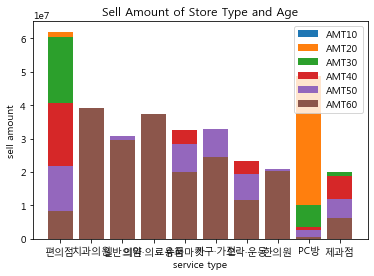

In [15]:
import matplotlib.font_manager as fm;
import matplotlib
# 폰트 설정 방법 1
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


plt.bar(df_analysis_age.SE_NAME, df_analysis_age.AMT10, label='AMT10')
plt.legend(loc='upper right')
plt.bar(df_analysis_age.SE_NAME, df_analysis_age.AMT20, label='AMT20')
plt.legend(loc='upper right')
plt.bar(df_analysis_age.SE_NAME, df_analysis_age.AMT30, label='AMT30')
plt.legend(loc='upper right')
plt.bar(df_analysis_age.SE_NAME, df_analysis_age.AMT40, label='AMT40')
plt.legend(loc='upper right')
plt.bar(df_analysis_age.SE_NAME, df_analysis_age.AMT50, label='AMT50')
plt.legend(loc='upper right')
plt.bar(df_analysis_age.SE_NAME, df_analysis_age.AMT60, label='AMT60')
plt.legend(loc='upper right')
plt.title("Sell Amount of Store Type and Age")
plt.xlabel("service type")
plt.ylabel("sell amount")
plt.show()

In [19]:
query1 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_MALE_AMT) AMTMALE,
       AVG(TS_FEMALE_AMT) AMTFEMALE,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 AMTAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_YEAR = 2017
      and T1.TS_QUARTER = 1
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 45
'''

query2 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_MALE_AMT) AMTMALE,
       AVG(TS_FEMALE_AMT) AMTFEMALE,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 AMTAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_YEAR = 2017
      and T1.TS_QUARTER = 2
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 45
'''

query3 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_MALE_AMT) AMTMALE,
       AVG(TS_FEMALE_AMT) AMTFEMALE,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 AMTAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_YEAR = 2017
      and T1.TS_QUARTER = 3
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 45
'''

query4 = '''
SELECT *
FROM(SELECT SE_NAME,
       AVG(TS_MALE_AMT) AMTMALE,
       AVG(TS_FEMALE_AMT) AMTFEMALE,
       (AVG(TS_MALE_AMT)+AVG(TS_FEMALE_AMT))/2 AMTAVG
       
FROM GENDER_AMT_ANALYSIS T1, 
     ASTORE T2, 
     ASERVICE T3 
WHERE (T1.S_CODE = T2.S_CODE)
      and (T1.SE_CODE = T3.SE_CODE)
      and T1.TS_YEAR = 2017
      and T1.TS_QUARTER = 4
Group By SE_NAME
Order By AMTAVG DESC) a1
WHERE ROWNUM BETWEEN 1 AND 45
'''

In [20]:
df_analysis_gender1 = pt.query_to_df(query1, conn, 1000000) 
df_analysis_gender2 = pt.query_to_df(query2, conn, 1000000) 
df_analysis_gender3 = pt.query_to_df(query3, conn, 1000000) 
df_analysis_gender4 = pt.query_to_df(query4, conn, 1000000) 

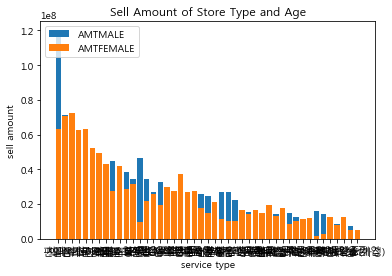

In [21]:
plt.bar(df_analysis_gender1.SE_NAME, df_analysis_gender1.AMTMALE, label='AMTMALE')
plt.legend(loc='upper left')
plt.bar(df_analysis_gender1.SE_NAME, df_analysis_gender1.AMTFEMALE, label='AMTFEMALE')
plt.legend(loc='upper left')
plt.title("Sell Amount of Store Type and Age")
plt.xlabel("service type")
plt.ylabel("sell amount")
plt.show()

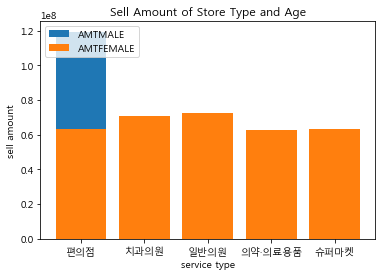

Text(0.5, 1.0, '4분기')

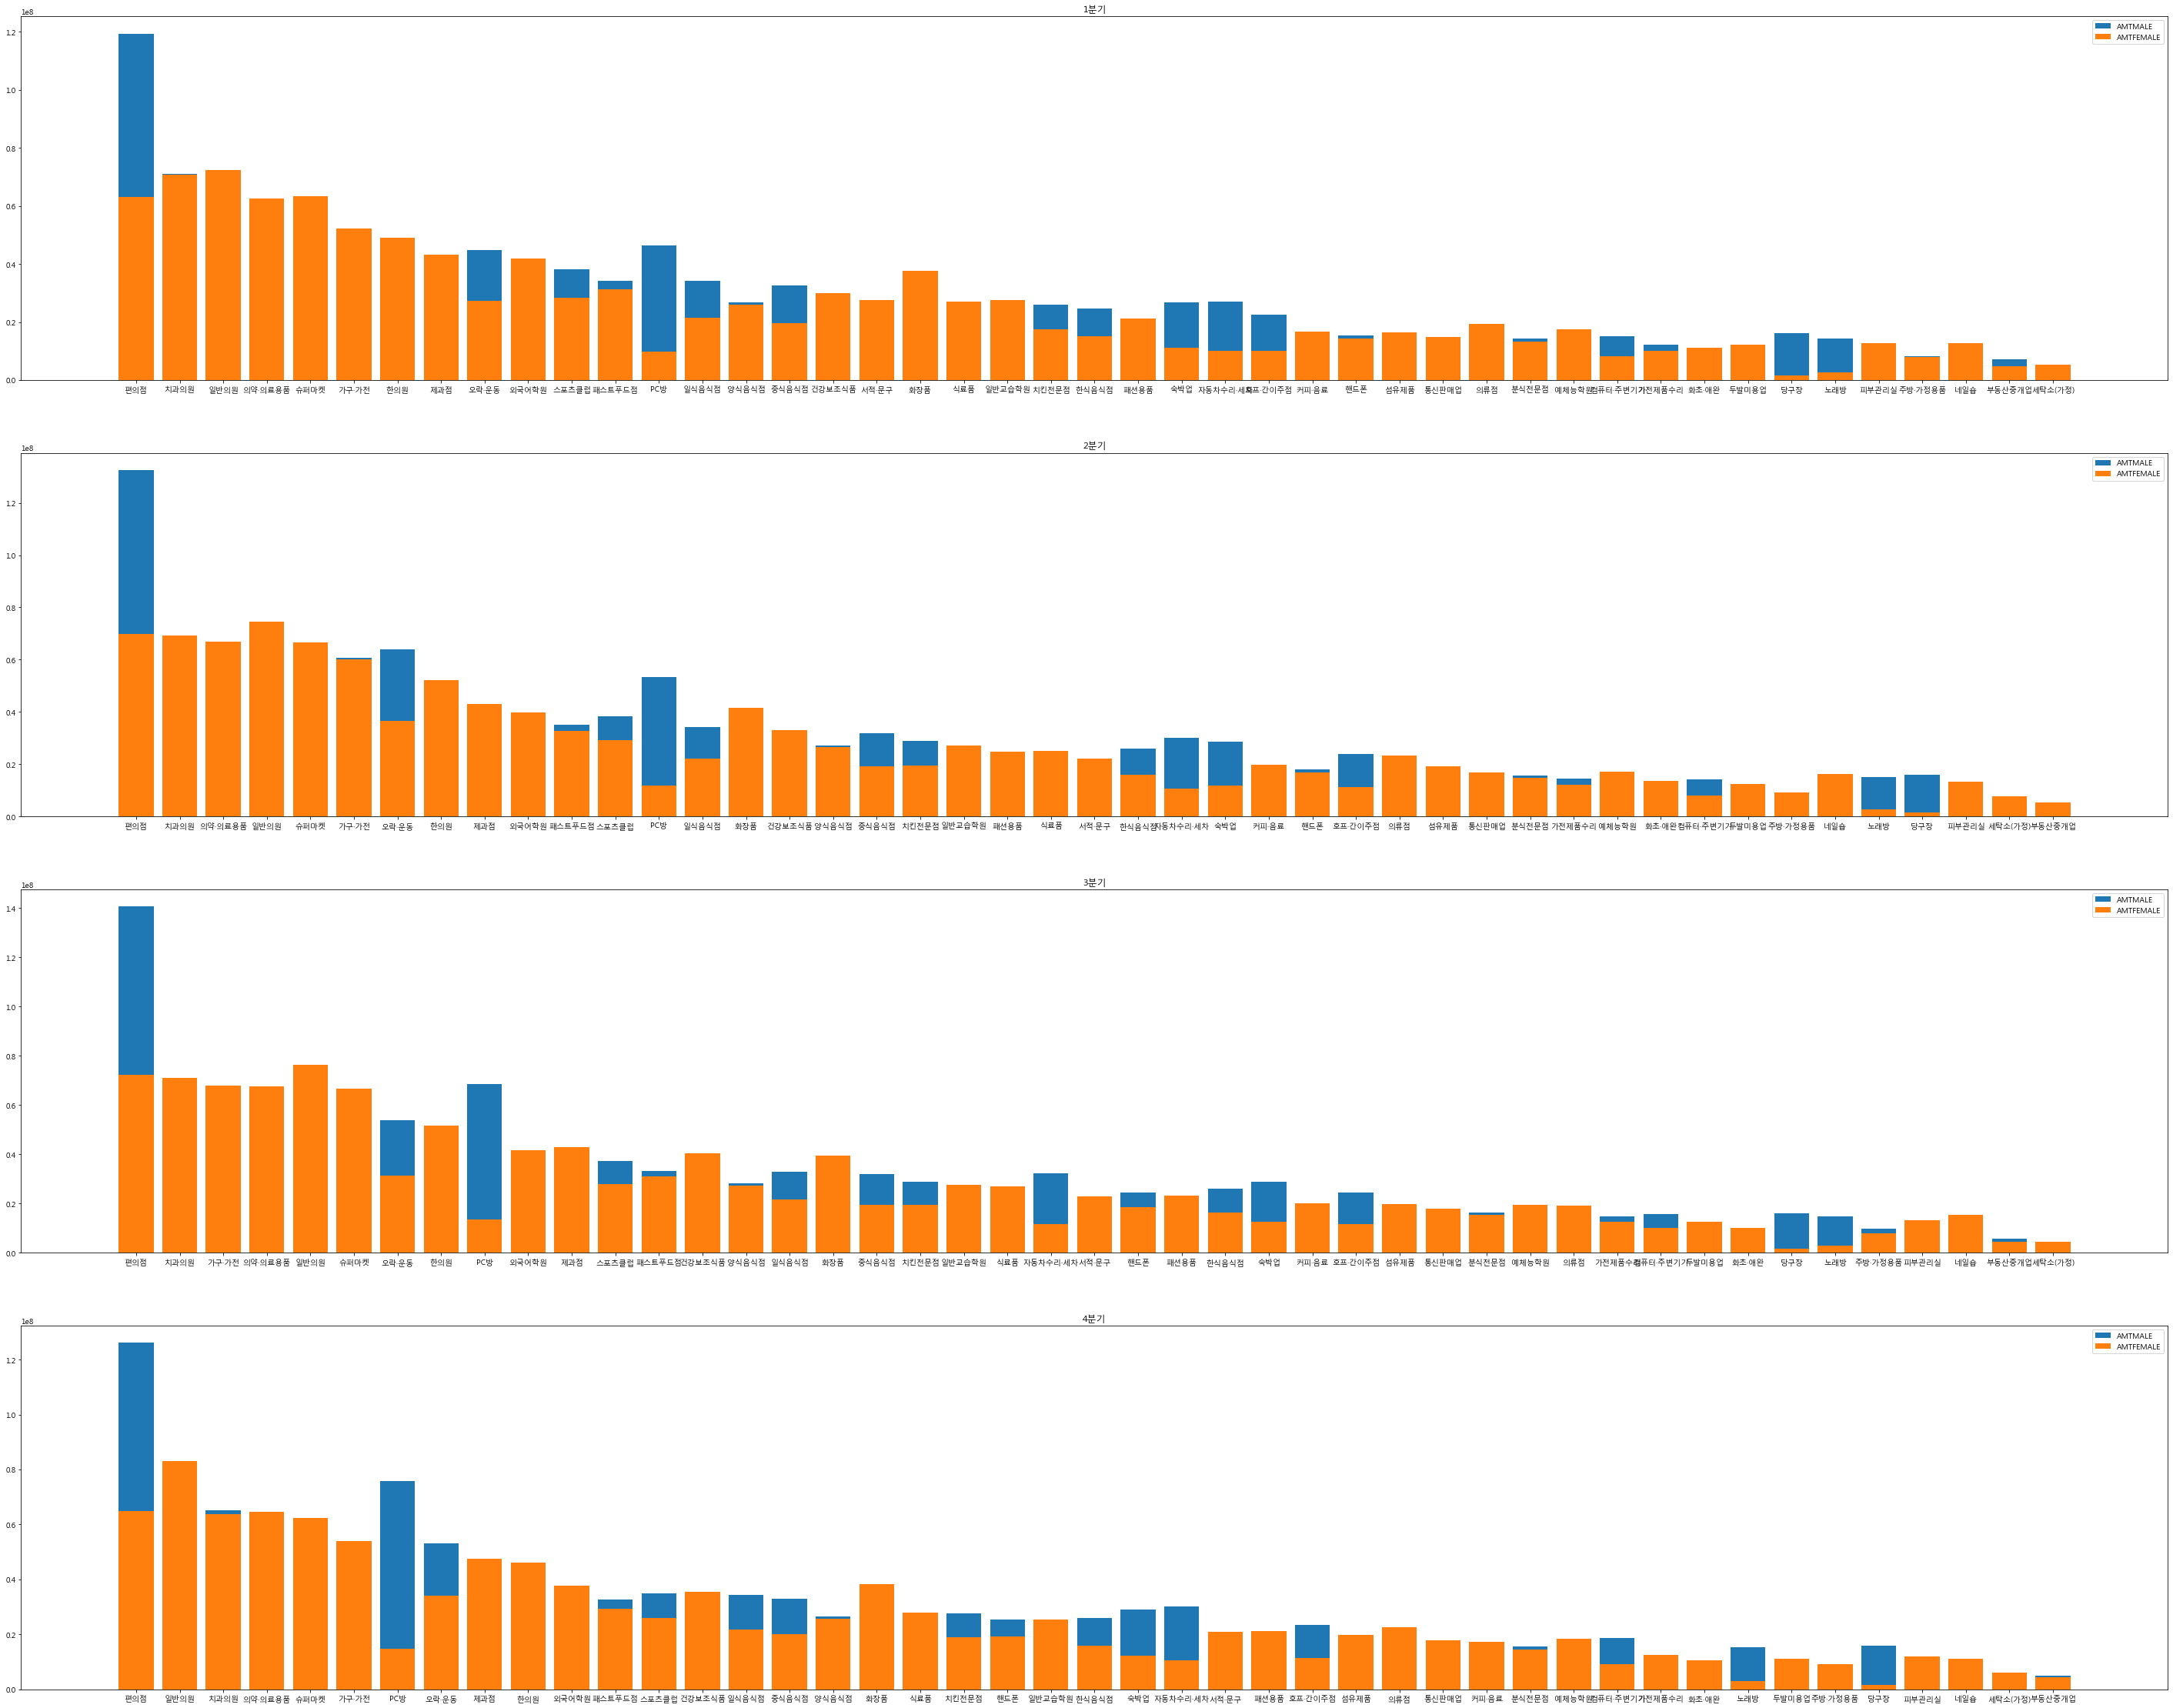

In [25]:
fig = plt.figure(figsize=(50, 40)) 

axes1 = fig.add_subplot(4,1,1)
axes2 = fig.add_subplot(4,1,2)
axes3 = fig.add_subplot(4,1,3)
axes4 = fig.add_subplot(4,1,4)

axes1.bar(df_analysis_gender1.SE_NAME, df_analysis_gender1.AMTMALE,label='AMTMALE') 
axes1.legend(loc='upper right')
axes1.bar(df_analysis_gender1.SE_NAME, df_analysis_gender1.AMTFEMALE,label='AMTFEMALE')
axes1.legend(loc='upper right')

axes2.bar(df_analysis_gender2.SE_NAME, df_analysis_gender2.AMTMALE,label='AMTMALE') 
axes2.legend(loc='upper right')
axes2.bar(df_analysis_gender2.SE_NAME, df_analysis_gender2.AMTFEMALE,label='AMTFEMALE')
axes2.legend(loc='upper right')

axes3.bar(df_analysis_gender3.SE_NAME, df_analysis_gender3.AMTMALE,label='AMTMALE') 
axes3.legend(loc='upper right')
axes3.bar(df_analysis_gender3.SE_NAME, df_analysis_gender3.AMTFEMALE,label='AMTFEMALE')
axes3.legend(loc='upper right')

axes4.bar(df_analysis_gender4.SE_NAME, df_analysis_gender4.AMTMALE,label='AMTMALE') 
axes4.legend(loc='upper right')
axes4.bar(df_analysis_gender4.SE_NAME, df_analysis_gender4.AMTFEMALE,label='AMTFEMALE')
axes4.legend(loc='upper right')

axes1.set_title("1분기") 
axes2.set_title("2분기")
axes3.set_title("3분기") 
axes4.set_title("4분기")



Text(0.5, 1.0, '4분기')

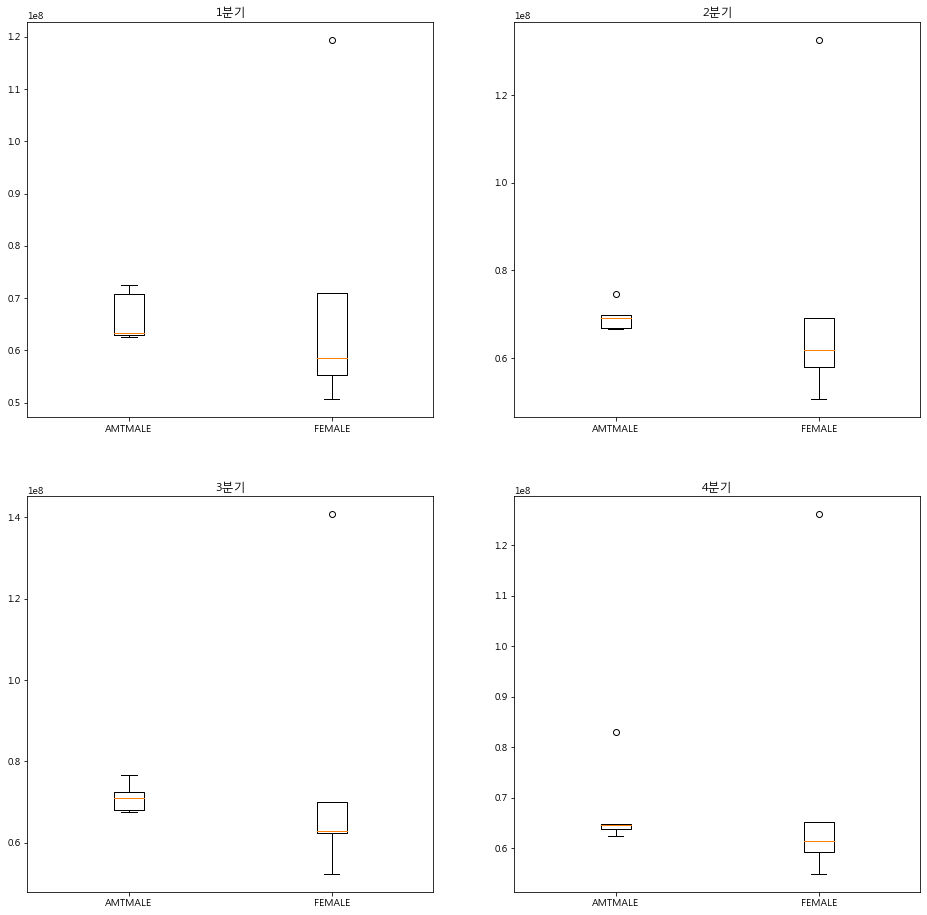

In [151]:
fig = plt.figure(figsize=(16, 16)) 

axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

axes1.boxplot([df_analysis_gender1.AMTFEMALE, df_analysis_gender1.AMTMALE],labels=['AMTMALE','FEMALE']) 

axes2.boxplot([df_analysis_gender2.AMTFEMALE, df_analysis_gender2.AMTMALE],labels=['AMTMALE','FEMALE']) 

axes3.boxplot([df_analysis_gender3.AMTFEMALE, df_analysis_gender3.AMTMALE],labels=['AMTMALE','FEMALE']) 

axes4.boxplot([df_analysis_gender4.AMTFEMALE, df_analysis_gender4.AMTMALE],labels=['AMTMALE','FEMALE']) 

axes1.set_title("1분기") 
axes2.set_title("2분기")
axes3.set_title("3분기") 
axes4.set_title("4분기")

In [150]:
df_analysis_gender1

,SE_NAME,AMTMALE,AMTFEMALE,AMTAVG
0,편의점,1.193603e+08,6.303694e+07,9.119860e+07
1,치과의원,7.099878e+07,7.084671e+07,7.092274e+07
2,일반의원,5.062172e+07,7.241280e+07,6.151726e+07
3,의약·의료용품,5.860943e+07,6.258018e+07,6.059481e+07
4,슈퍼마켓,5.533119e+07,6.330716e+07,5.931917e+07
